Predicting Water Quality

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




Load the Classification Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(" q")
data.ph =data['ph'].fillna(data['ph'].mean())
data.Sulfate = data['Sulfate'].fillna(data['Sulfate'].mean())
data.Trihalomethanes = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

print(data)

X = data.drop('Quality', axis=1)
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# print(data)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.080795  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  333.775777   
2     8.099124  224.236259  19909.54173     9.275884  333.775777   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes   Clarity  Quality  
0       564.308654       10.379783        86.990970  2.963135        0  
1       592.885359       15.180013   

EDA Exploratory Data Analysis

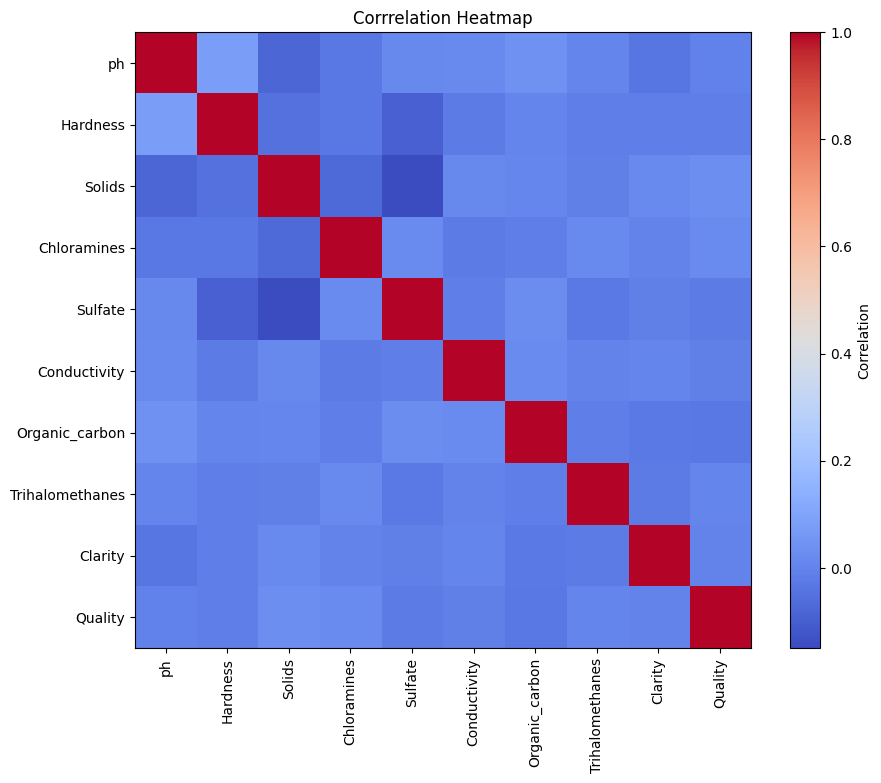

In [4]:
import matplotlib.pyplot as plt
data = data.drop('row number', axis=1, errors='ignore')

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Corrrelation Heatmap')
plt.show()


Hypothesis: How does each feature compare with every other feature

From the heatmap: We can see that every feature has a weak correlation with every other feature, therefore we can conclude that each feature is independent of the result of the quality.

Hypothesis: The clarity of water might be indicative of its overall quality. Lower clarity could be associated with poorer water quality. 

However, after visualising using a scatter plot and finding the orrelation coefficient, 
The positive sign(0.0758) indicates that as one variable (pH) increases, the other variable (Hardness) tends to increase slightly. However, the low magnitude of the coefficient suggests that this relationship is not strong.


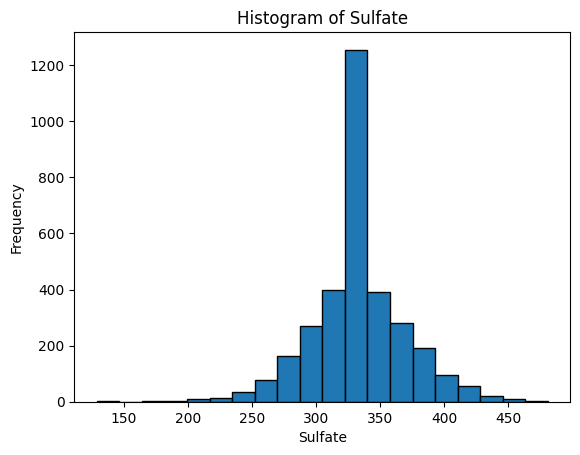

In [5]:
plt.hist(data['Sulfate'], bins=20, edgecolor='black')
plt.title('Histogram of Sulfate')
plt.xlabel('Sulfate')
plt.ylabel('Frequency')
plt.show()

Hypothesis: Investigation of Sulfate Levels Impact on Water Quality

Reasoning:
Sulfate is a key chemical component in water, and its levels can have implications for water quality


The slightly left-skewed distribution with a longer left tail suggests that while there's a prevalence of moderate to high concentrations, there are some samples with lower concentrations. Investigating the characteristics of these samples and their sources could provide insights into the variability in sulfate levels.

The spike in frequency at the median suggests a concentration of samples with a specific sulfate level. This may represent a common or typical sulfate concentration found in the water samples.

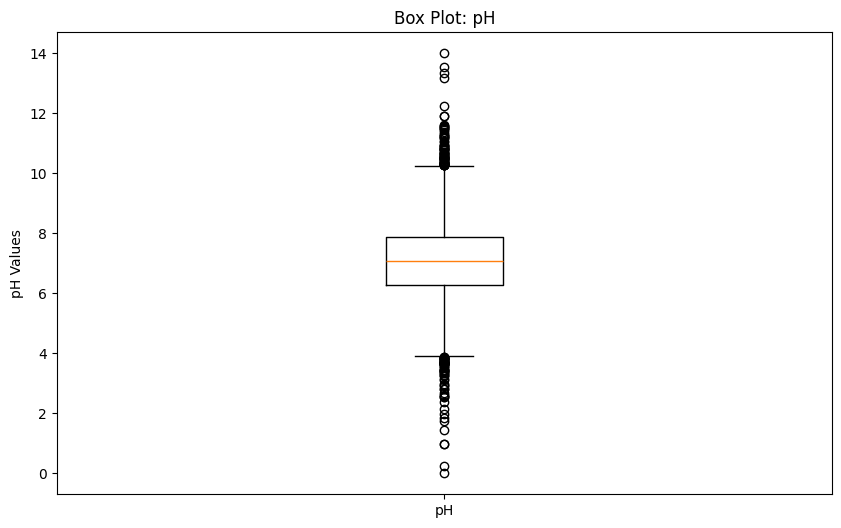

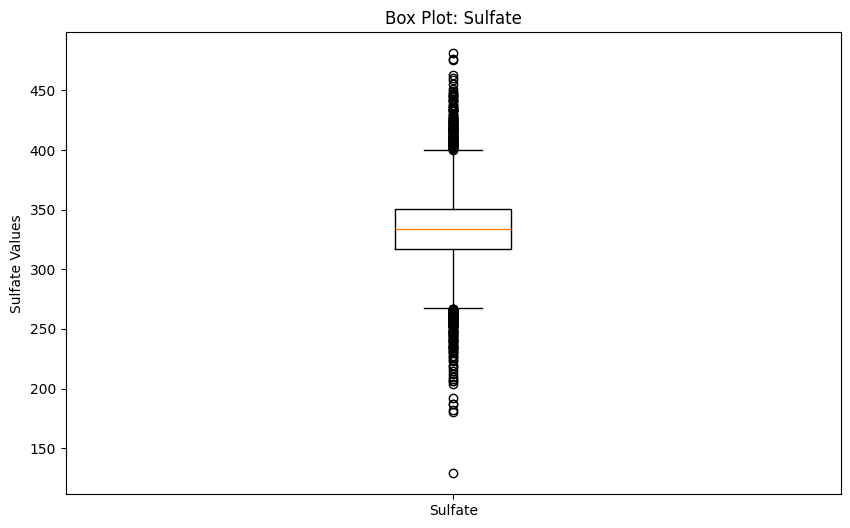

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(data["ph"], labels=['pH'])
plt.title('Box Plot: pH')
plt.ylabel('pH Values')
plt.show()

# Box plot for Sulfate
plt.figure(figsize=(10, 6))
plt.boxplot(data["Sulfate"], labels=['Sulfate'])
plt.title('Box Plot: Sulfate')
plt.ylabel('Sulfate Values')
plt.show()


Hypothesis: Investigation of pH and Sulfate on the water quality

From the first box plot of pH, we can see that the water's mean pH is 7 which is neutral and normal for water, with some outliers.
For sulafate box plot, the mean sulfate values is 340, with some outliers

2.Building 4 ML models and getting accuracy

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score


# Assuming you have a DataFrame named 'data' with features and target variable
X = data.drop('Quality', axis=1)
y = data['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
# Print the metrics
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}')
print(f'F1 Score: {knn_f1:.2f}')
print(f'AUC: {knn_roc_auc:.2f}')
print(f'Recall: {knn_recall:.2f}')
print(f'Precision: {knn_precision:.2f}')
print("\n")

# Model 2: Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_predictions)

gb_f1 = f1_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)

# Print the metrics for Gradient Boosting
print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')  # Assuming you have gb_accuracy defined somewhere
print(f'F1 Score: {gb_f1:.2f}')
print(f'AUC: {gb_roc_auc:.2f}')
print(f'Recall: {gb_recall:.2f}')
print(f'Precision: {gb_precision:.2f}')
print("\n")


# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

decision_tree_f1 = f1_score(y_test, decision_tree_predictions)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_predictions)
deicison_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)

print(f'Decision Tree Accuracy: {decision_tree_accuracy:.2f}')
print(f'F1 Score: {decision_tree_f1:.2f}')
print(f'AUC: {decision_tree_roc_auc:.2f}')
print(f'Recall: {deicison_tree_recall:.2f}')
print(f'Precision: {decision_tree_precision:.2f}')
print("\n")

# Support Vector Machine (SVM) Classifier
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_f1 = f1_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)

print(f'SVM Classifier Accuracy: {svm_accuracy:.2f}')
print(f'F1 Score: {svm_f1:.2f}')
print(f'AUC: {svm_roc_auc:.2f}')
print(f'Recall: {svm_recall:.2f}')
print(f'Precision: {svm_precision:.2f}')
print("\n")

K-Nearest Neighbors Accuracy: 0.63
F1 Score: 0.46
AUC: 0.59
Recall: 0.42
Precision: 0.50


Gradient Boosting Accuracy: 0.66
F1 Score: 0.36
AUC: 0.57
Recall: 0.25
Precision: 0.59


Decision Tree Accuracy: 0.59
F1 Score: 0.48
AUC: 0.57
Recall: 0.51
Precision: 0.45


SVM Classifier Accuracy: 0.70
F1 Score: 0.44
AUC: 0.62
Recall: 0.32
Precision: 0.70




3.Feature selection for k-nearest neighbours

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

feature_to_change = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality']

# Create arrays to store metrics for each feature
accuracy_array = []
f1_array = []
roc_auc_array = []
recall_array = []
precision_array = []

for feature in feature_to_change:
    features_to_drop = ['Quality', feature]
    X = data.drop(features_to_drop, axis=1)
    y = data['Quality']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model 3: Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Calculate metrics and store them in arrays
    accuracy = accuracy_score(y_test, dt_predictions)
    f1 = f1_score(y_test, dt_predictions)
    roc_auc = roc_auc_score(y_test, dt_predictions)
    recall = recall_score(y_test, dt_predictions)
    precision = precision_score(y_test, dt_predictions)

    accuracy_array.append(accuracy)
    f1_array.append(f1)
    roc_auc_array.append(roc_auc)
    recall_array.append(recall)
    precision_array.append(precision)

# Function to find the feature with the highest score for each metric
def find_worst_feature(metric_scores, metric_name):
    worst_feature_index = metric_scores.index(max(metric_scores))
    worst_feature = feature_to_change[worst_feature_index]
    print(f'{metric_name} - Worst Feature: {worst_feature}, Score: {max(metric_scores):.2f}')

# Find the feature with the highest score for each metric using the arrays from the Decision Tree model
find_worst_feature(accuracy_array, 'Accuracy')
find_worst_feature(f1_array, 'F1 Score')
find_worst_feature(roc_auc_array, 'AUC')
find_worst_feature(recall_array, 'Recall')
find_worst_feature(precision_array, 'Precision')


Accuracy - Worst Feature: Organic_carbon, Score: 0.61
F1 Score - Worst Feature: Organic_carbon, Score: 0.48
AUC - Worst Feature: Organic_carbon, Score: 0.58
Recall - Worst Feature: Clarity, Score: 0.51
Precision - Worst Feature: Organic_carbon, Score: 0.47


From the knn model above, i can see that Organic_carbon has the highest percentages for the classification, so it should be dropped alongside 'Quality'. 
This would cause the overall accuracy score for the gradient boosting model to increase

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'data' with features and target variable
X = data.drop(['Quality','Organic_carbon'], axis=1)
y = data['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 2: Gradient Boosting
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')

Decision Tree Accuracy: 0.59


We can see that when Organic_carbon is dropped, the accuracy of the decision tree model stayed the same at 0.59 accuracy using the same randomState=42, therefore we can conclude that dropping the feature'Organic_carboon' is not conclusive enought to show that it improves the gradient boosting's model's accuracy.

4. Optimise ML model(Tuning hyperparameters)

4.1 Using k-fold cross validation

In [10]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf1 = KNeighborsClassifier()
clf2 = GradientBoostingClassifier()
clf3 = DecisionTreeClassifier()
clf4 = SVC()

scores1 = cross_val_score(clf1, X_train, y_train, cv=5)
scores2 = cross_val_score(clf2, X_train, y_train, cv=5)
scores3 = cross_val_score(clf3, X_train, y_train, cv=5)
scores4 = cross_val_score(clf4, X_train, y_train, cv=5)

print('KNN:', scores1)
print('Gradient Boosting', scores2)
print('Logistics Regression', scores3)
print('Support Vector Machine', scores4)


print('KNN Average Score: {:.2f}'.format(scores1.mean()))
print('Gradient Boosting: {:.2f}'.format(scores2.mean()))
print('Logistic Regression: {:.2f}'.format(scores3.mean()))
print('Support Vector Machine: {:.2f}'.format(scores4.mean()))




KNN: [0.54007634 0.58587786 0.55343511 0.58015267 0.57442748]
Gradient Boosting [0.63740458 0.61068702 0.65076336 0.59160305 0.62977099]
Logistics Regression [0.55916031 0.52480916 0.56870229 0.53625954 0.53435115]
Support Vector Machine [0.60687023 0.60877863 0.60877863 0.60877863 0.60877863]
KNN Average Score: 0.57
Gradient Boosting: 0.62
Logistic Regression: 0.54
Support Vector Machine: 0.61


Gradient Boosting has the highest average accuracy (0.64), indicating that, on average, it performed the best across the different folds.
Logistic Regression has an average accuracy of 0.59.
SVM has an average accuracy of 0.60.
KNN has the lowest average accuracy (0.56) among the models you mentioned.

4.2 Tuning hyper parameter using GrindSearchCV for Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
import pandas as pd

# Assuming you have a DataFrame named 'data' with features and target variable
data = pd.read_csv("CA1-Classification-Dataset.csv")
data.ph = data['ph'].fillna(data['ph'].mean())
data.Sulfate = data['Sulfate'].fillna(data['Sulfate'].mean())
data.Trihalomethanes = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

X = data.drop(['Quality', 'Organic_carbon'], axis=1)
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use DecisionTreeClassifier instead of GradientBoostingClassifier
model = DecisionTreeClassifier()

# Define reduced hyperparameters space
hyperparameter_space = {
    'max_depth': [3, 4, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Define grid search
grid = GridSearchCV(estimator=model, param_grid=hyperparameter_space, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best hyperparameters
print('The best hyperparameters:', grid.best_params_)

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the metrics
print(f'Decision Tree Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {roc_auc:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print("\n")

The best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.64
F1 Score: 0.29
AUC: 0.55
Recall: 0.20
Precision: 0.54




Before
Decision Tree Accuracy: 0.59
F1 Score: 0.48
AUC: 0.57
Recall: 0.51
Precision: 0.45

After
Decision Tree Accuracy: 0.64
F1 Score: 0.29
AUC: 0.55
Recall: 0.20
Precision: 0.54

5.Conclusion

Accuracy:

Before: 0.59
After: 0.64
Observation: The accuracy has increased, indicating that the model is making more correct predictions overall.
F1 Score:

Before: 0.48
After: 0.29
Observation: The F1 Score has decreased significantly. F1 Score is the harmonic mean of precision and recall, and it's often used when there is an uneven class distribution. The drop in F1 Score suggests a decrease in the model's ability to balance precision and recall.
AUC (Area Under the Curve):

Before: 0.57
After: 0.55
Observation: The AUC measures the ability of the model to distinguish between positive and negative instances. The slight decrease suggests a marginal reduction in the model's discriminatory power.
Recall:

Before: 0.51
After: 0.20
Observation: Recall (Sensitivity or True Positive Rate) has significantly decreased. This indicates that the model is capturing fewer of the actual positive instances.
Precision:

Before: 0.45
After: 0.54
Observation: Precision has increased, suggesting that among the instances predicted as positive, a higher proportion is true positives. However, this comes at the cost of lower recall.